# Spiral Galaxy Rotation Curves

Figure 6.2 from Chapter 6 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Rotation curves for spiral galaxies of class Sb; the thick black line is the rotation curve of the Milky Way
Galaxy, normalized to $r_\odot = 8$\,kpc and $v_\mathrm{circ} = 200\,\mathrm{km\,s}^{-1}$.

Data from Sofue et al. [1999, ApJ, 523, 136](https://ui.adsabs.harvard.edu/abs/1999ApJ...523..136S), derived
from the online repository at the University of Tokyo [RC99](https://www.ioa.s.u-tokyo.ac.jp/~sofue/RC99/rc99.htm).

In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [5]:
plotFile = 'Fig6_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Rotation curve data

ASCII text files with the rotation curves are in the `Sofue99/` folder which contains all of the data from
Sofue et al. 1999. We've selected the Sb galaxies listed in the `sbList` array. Galaxy `0000` is the Milky Way,
but all others are NGC numbers.

Data are 2-column ASCII with comments elimited with a # character:
 * Col 1: R - galactocentric radius in kpc
 * Col 2: V - rotation speed in km/s

In [6]:
dataDir = 'Sofue99'

sbList = ['0000','0224','0891','1068','1417','2590','2708','2841','3031','3628','4527','4565']

rKpc = {}
vCirc = {}

for galaxy in sbList:
    dataFile = f'{dataDir}/{galaxy}.dat'
    data = pd.read_csv(dataFile,sep=r'\s+',comment='#',header=None)

    rKpc[galaxy] = np.array(data[0])
    vCirc[galaxy] = np.array(data[1])

# plotting limits

rMin = 0.0
rMax = 30.0 

vMin = 0.0
vMax = 360.0

### Figure 6.2

Plot the rotation curve as a function of galactocentric radius.  The Milky Way (object '0000') is plotted with
a heavy black line

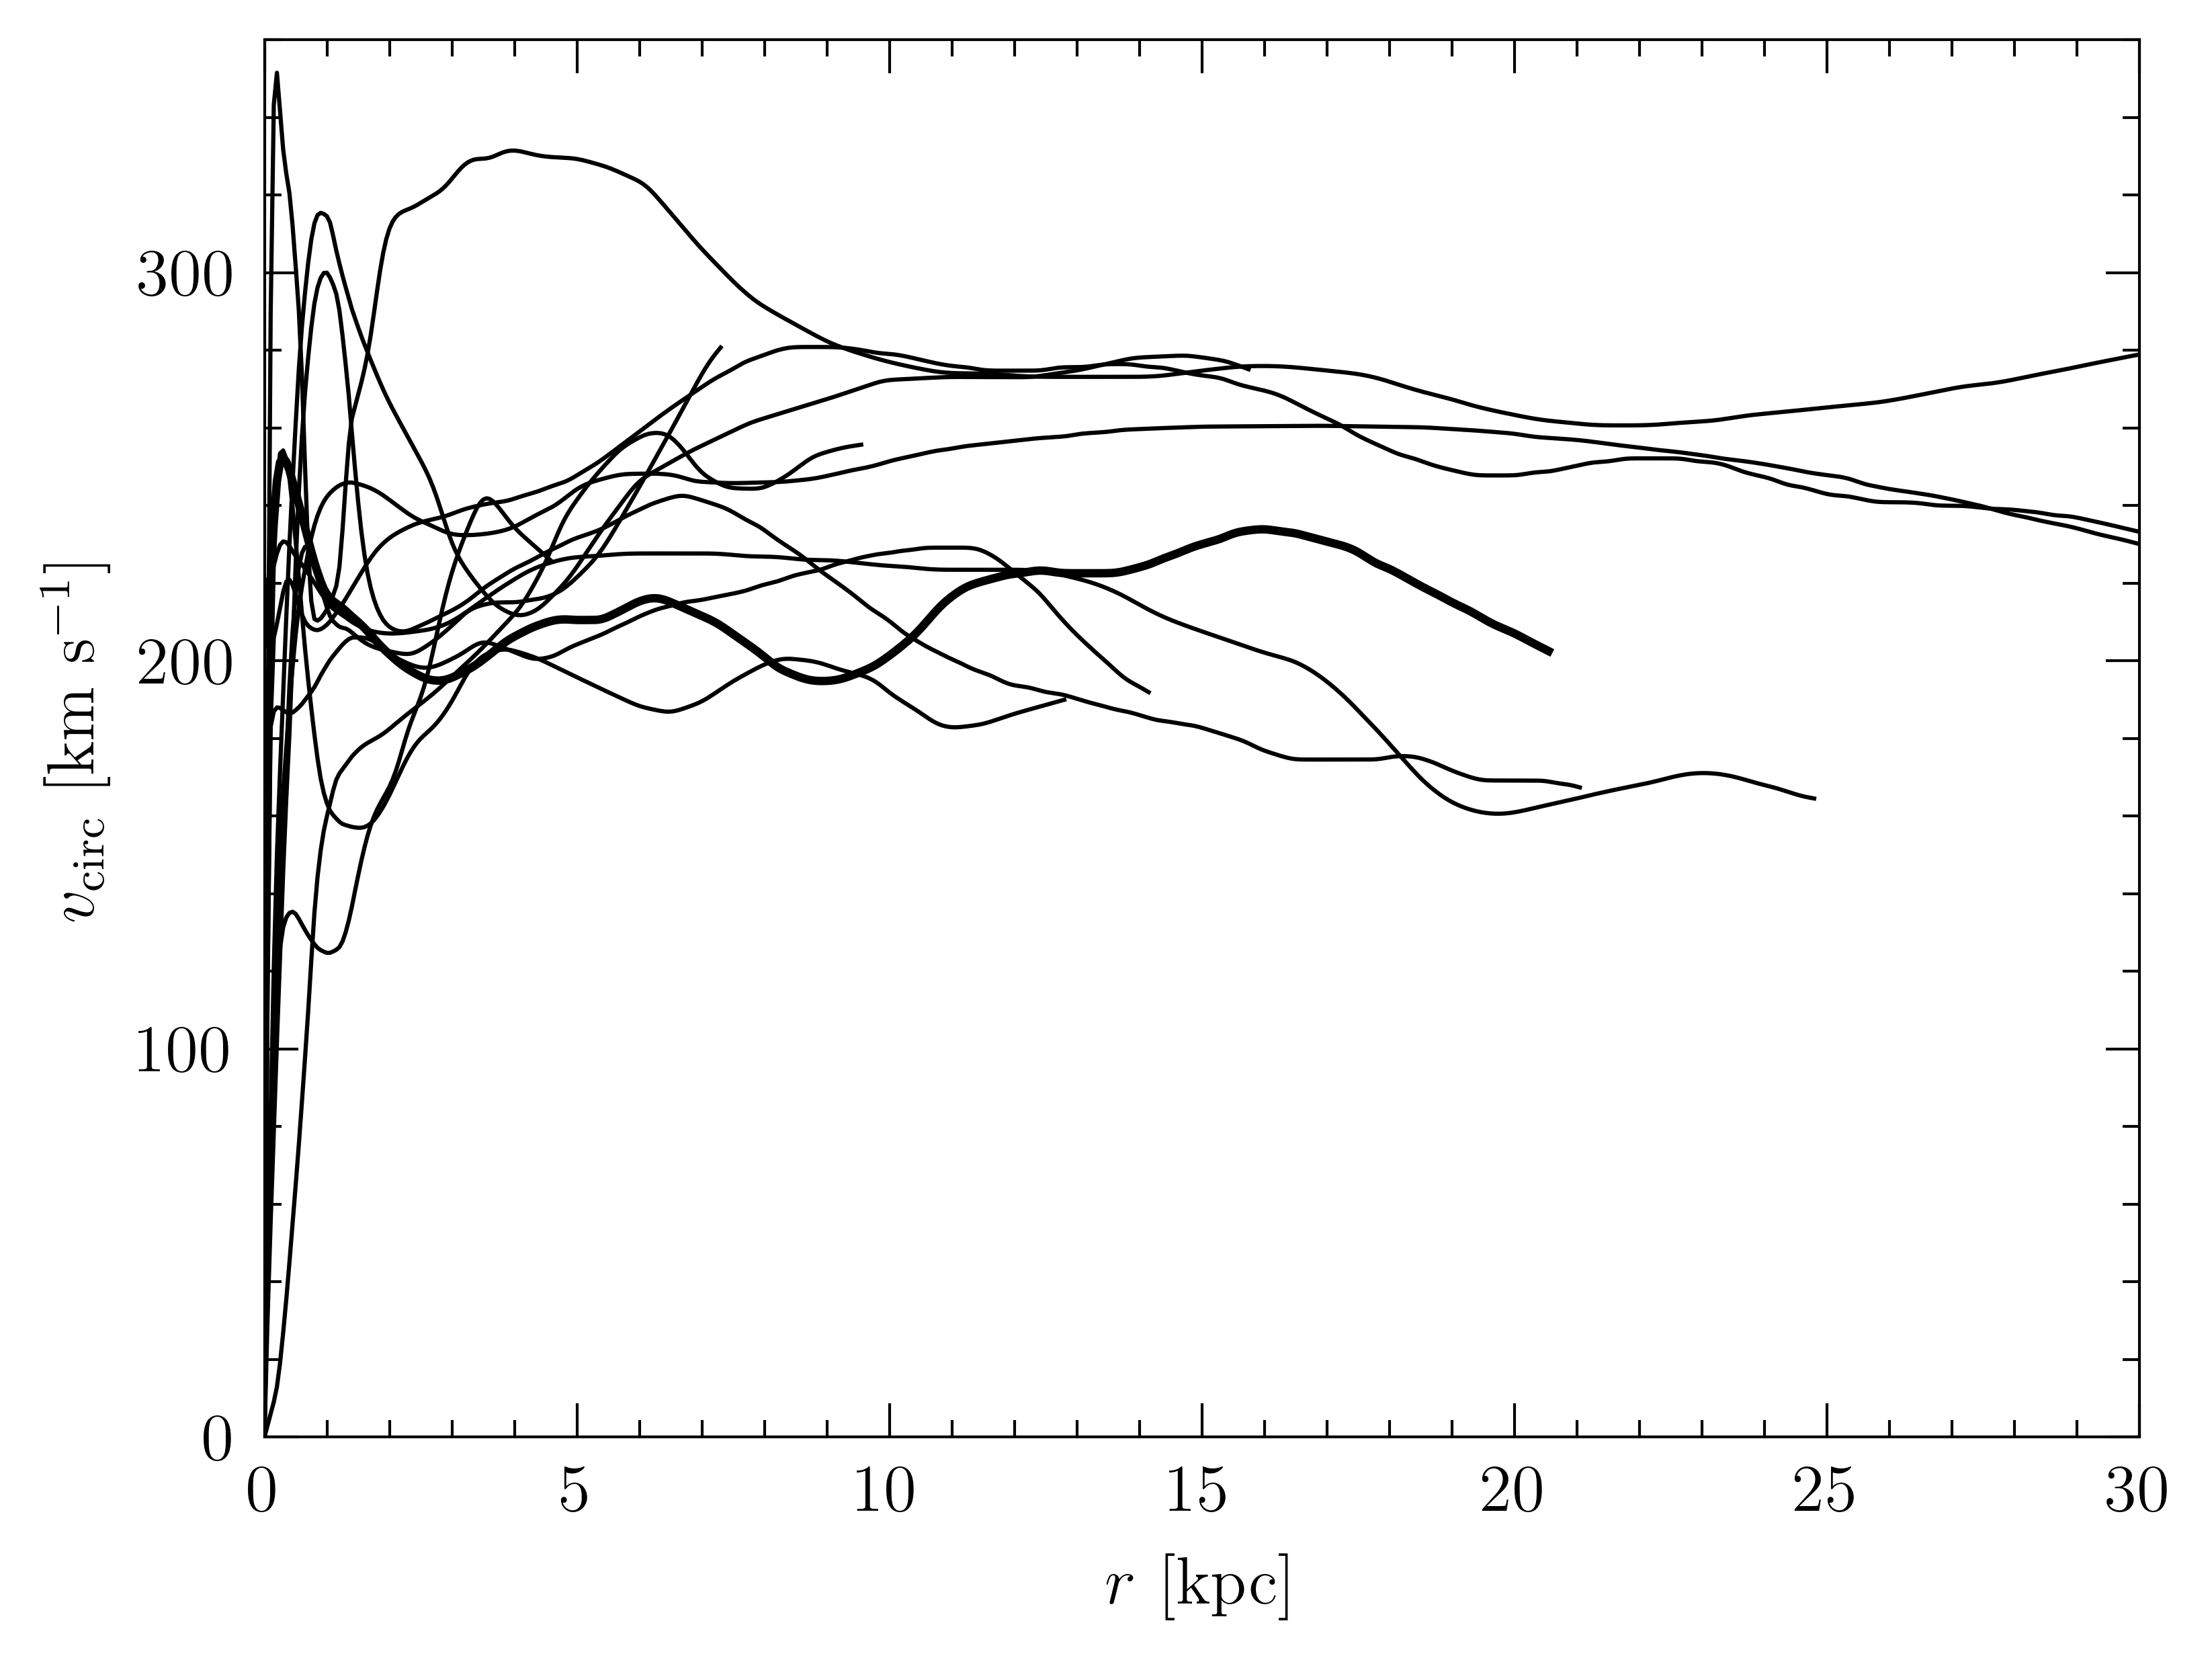

In [7]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(rMin,rMax)
ax.xaxis.set_major_locator(MultipleLocator(5.0))
ax.xaxis.set_minor_locator(MultipleLocator(1.0))
ax.set_xlabel(r'$r$ [kpc]',fontsize=axisFontSize)

ax.set_ylim(vMin,vMax)
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylabel(r'$v_{\rm circ}$ [km s$^{-1}$]',fontsize=axisFontSize)

# Milky Way is heavy black, others are thin

for galaxy in sbList:
    if galaxy == '0000':
        ax.plot(rKpc[galaxy],vCirc[galaxy],'-',lw=1.5,color='black',zorder=10)
    else:
        ax.plot(rKpc[galaxy],vCirc[galaxy],'-',lw=0.75,color='black',zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')